<hr>

<h3>The below project is a partial report on the project to classify a customer of Santander Bank to be satisfied or not.</h3>
<p>Throughout the project I have tried to use different techniques of feature engineering and feature selection with the use of some basic classifying techniques to compare the results of different classifiers.
    The dataset provided by the bank does not contain a data definition which makes it harder to research on the features and there usage. So without trying to find out what these features are , I tried to use statistical methods to determine important features and use them into my classifiers. 
<ul>
    <li>Feature Selections Methods : Chi2 and F_classif</li>
    <li>Classifiers : MLPClassifiers,LogisticRegression,XGBoost, RandomForest, Voting Classifier and Stacking Classifier</li>
</ul>
Eventhough this is my submission for the project but this project can be extended to include a lot of other techniques in order to provide a much greater accuracy score in terms of ROC AUC.
</p>

In [2]:
#Importing modules for data preprocessing
import pandas as pd
import numpy as np

#importing modules for visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style = "white",color_codes=True)

In [3]:
# Loading the training and test datasets
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

In [4]:
#Seeing whats inside the training set
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
train.columns
#Data set contains 371 columns including ID and Target column

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [6]:
train.dtypes
#Most of them are the columns are of type int64 or float64

ID                                 int64
var3                               int64
var15                              int64
imp_ent_var16_ult1               float64
imp_op_var39_comer_ult1          float64
imp_op_var39_comer_ult3          float64
imp_op_var40_comer_ult1          float64
imp_op_var40_comer_ult3          float64
imp_op_var40_efect_ult1          float64
imp_op_var40_efect_ult3          float64
imp_op_var40_ult1                float64
imp_op_var41_comer_ult1          float64
imp_op_var41_comer_ult3          float64
imp_op_var41_efect_ult1          float64
imp_op_var41_efect_ult3          float64
imp_op_var41_ult1                float64
imp_op_var39_efect_ult1          float64
imp_op_var39_efect_ult3          float64
imp_op_var39_ult1                float64
imp_sal_var16_ult1               float64
ind_var1_0                         int64
ind_var1                           int64
ind_var2_0                         int64
ind_var2                           int64
ind_var5_0      

In [7]:
#removing ID columns
trainID = train.ID
testID = test.ID
#train.drop(train.ID)
#list(train.ID)
train = train.drop(columns='ID')
test = test.drop(columns='ID')
print(train.head())
print(test.head())

   var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0     2     23                 0.0                      0.0   
1     2     34                 0.0                      0.0   
2     2     23                 0.0                      0.0   
3     2     37                 0.0                    195.0   
4     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  imp_op_var40_ult1  \
0                      0.0                      0.0               

In [8]:
#Dataset description after removing ID and target
train.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


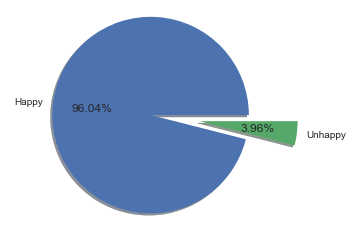

,TARGET,Percentage
0,73012,96.043147
1,3008,3.956853


In [9]:
#Looking at the distribution of Target variable
targetdf = pd.DataFrame(train.TARGET.value_counts())
targetdf['Percentage']=100*targetdf['TARGET']/train.shape[0]

#Happy customers have TARGET = 0 and unhappy have TARGET = 1
#Seems like less than 4% are unhappy which makes this a very unbalanced dataset
labels=['Happy','Unhappy']
explode=(0.5,0)
plt.pie(list(targetdf.TARGET),labels=labels,autopct='%1.2f%%',shadow=True,explode=explode)
plt.axis('equal')
plt.show()
targetdf

<h4>The data set is unbalanced which is kept as it is till further investigation

In [10]:
#Description of each feature
#Feature names suggests that var3, var15, num_var38 are features out of which no other feature is derived from
#whereas other features have names which suggests they are being derived from the same category or likewise.

train.columns.values

array(['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3', 'imp_op_var40_ult1',
       'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3',
       'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3',
       'imp_op_var41_ult1', 'imp_op_var39_efect_ult1',
       'imp_op_var39_efect_ult3', 'imp_op_var39_ult1',
       'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0',
       'ind_var2', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6',
       'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12',
       'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto',
       'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0',
       'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14',
       'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18',
       'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var2

<hr>
<h4> Looking into var15

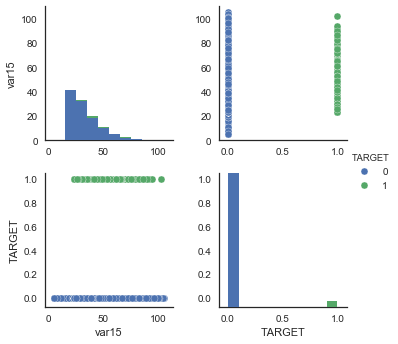

In [11]:
#var15
sns.pairplot(train,vars=['var15','TARGET'],hue='TARGET')
plt.show()

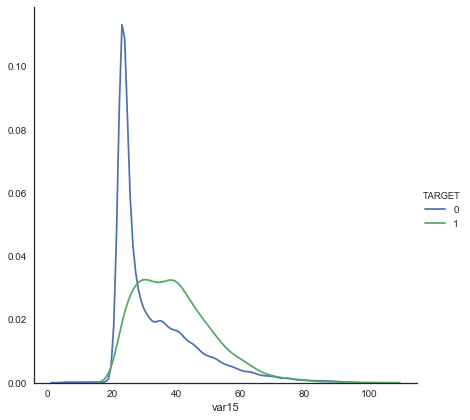

count    76020.000000
mean        33.212865
std         12.956486
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64

In [12]:
#Taking a look into var15
sns.FacetGrid(train,hue="TARGET",size=6).map(sns.kdeplot,'var15').add_legend()
plt.show()
train.var15.describe()
#The variable seems to contain integers with a range between 5 and 105 suggesting it is age
#Most of the happy customers are younger than most of the unhappy customers.

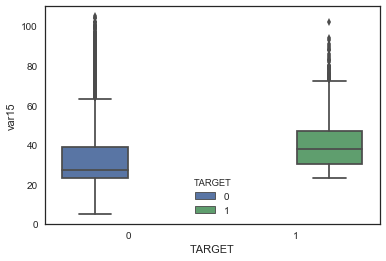

In [13]:
#Boxplot of var15
g=sns.boxplot(x='TARGET',y='var15',hue='TARGET',data=train)
plt.show()
#Boxplot confirms the mean age of the happy customers are lower than that of the unhappy ones.

In [14]:
#outliers
q = train["var15"].quantile(0.99)
no_outliers= train[train["var15"]<q]
no_outliers.describe()
# Deleting outliers removes 800 rows so decided to keep the outliers

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,75203.000000,75203.000000,75203.000000,75203.000000,75203.000000,75203.000000,75203.000000,75203.000000,75203.000000,75203.000000,...,75203.000000,75203.000000,75203.000000,75203.000000,75203.000000,75203.000000,75203.000000,75203.000000,7.520300e+04,75203.000000
mean,-1526.527133,32.658032,84.497094,72.910973,120.435108,3.575923,6.470801,0.417433,0.573516,3.175280,...,8.022038,1.379977,12.348289,8.879504,28.068466,1.760568,68.138411,51.324297,1.169883e+05,0.039626
std,39075.329349,11.862130,1548.145283,340.406656,548.141152,93.573916,153.853627,30.770631,36.711272,95.708306,...,458.356170,114.576909,787.449277,541.355348,1951.016309,146.585505,3871.942904,2756.507591,1.798955e+05,0.195080
min,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.781124e+04,0.000000
50%,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.063231e+05,0.000000
75%,2.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.185895e+05,0.000000
max,238.000000,76.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


<hr>
<h4>Looking into features starting with imp_

In [15]:
cols = []
for each_item in train.columns:
    if each_item.startswith('imp'):
        cols.append(each_item)
        
train[cols].describe()


,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,...,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.0,76020.000000,76020.000000,76020.000000,76020.0,76020.000000,76020.000000,7.602000e+04
mean,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,68.803937,113.056934,...,1.874808,2.512678,0.0,1.913616,2.789772,0.314701,0.0,0.039463,3.787137,8.143383e+01
std,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,319.605516,512.154823,...,388.245022,508.968831,0.0,357.405330,323.814261,53.408085,0.0,10.880712,811.976086,1.128241e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00
max,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,12888.030000,16566.810000,...,96781.440000,133730.580000,0.0,69622.290000,49581.270000,13207.320000,0.0,3000.000000,209834.400000,2.754476e+06


In [16]:
#removing features with 0 variance
#There are some features with std = 0. 
x =[]
for col in train.columns:
    if train[col].std() == 0:
        x.append(col)
        
train.drop(x,axis=1,inplace=True)
test.drop(x,axis=1,inplace=True)

In [17]:
len(train.columns.values)
#number of features reduced from 370 to 336

336

In [18]:
#removing duplicate or identical features
x=[]
cols = train.columns
for i in range(len(cols)-1):
    vals=train[cols[i]].values
    for j in range(i+1,len(cols)):
        if np.array_equal(vals,train[cols[j]].values):
            x.append(cols[j])

In [19]:
train.drop(x,axis=1,inplace=True)
test.drop(x,axis=1,inplace=True)

In [20]:
len(train.columns.values)
#number of features reduced from 336 to 307

307

<h5>There are a lot of features about 307 of them . The target variable is dependent on only a small amount of them all. 
To find out the most depenedent columns I will use Chi2 and f_classif to select features and reduce the number of 
dimensions.</h5>

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
#XgBoost classifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [22]:
X = train.iloc[:,:-1]
y = train.TARGET

In [23]:
# Add number of zeroes in each row as a feature
X['n0'] = (X==0).sum(axis=1)

In [24]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif,chi2
from sklearn.preprocessing import Binarizer, scale



In [25]:
X_bin = Binarizer().fit_transform(scale(X))

/Users/soham/miniconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [26]:
selectChi2 = SelectPercentile(chi2,percentile=25).fit(X_bin,y)
selectF_classif = SelectPercentile(f_classif,percentile=25).fit(X,y)


/Users/soham/miniconda3/lib/python3.5/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


In [27]:
chi2_selected = selectChi2.get_support()
chi2_selected_features = [f for i,f in enumerate(X.columns)
                         if chi2_selected[i]]

In [28]:
print('Chi2 selected features {}, {}'.format(chi2_selected.sum(),chi2_selected_features))

Chi2 selected features 76, ['var15', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'ind_var5', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13', 'ind_var14_0', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_cte', 'ind_var25_0', 'ind_var30', 'num_var4', 'num_var5', 'num_var8_0', 'num_var8', 'num_var12_0', 'num_var12', 'num_var13_0', 'num_var13_corto_0', 'num_var13_corto', 'num_var13_largo_0', 'num_var13_largo', 'num_var13', 'num_var14_0', 'num_var24_0', 'num_var24', 'num_var25_0', 'num_var30_0', 'num_var30', 'num_var35', 'num_var42_0', 'num_var42', 'saldo_var5', 'saldo_var12', 'saldo_var13_corto', 'saldo_var13_largo', 'saldo_var13', 'saldo_var24', 'saldo_var30', 'saldo_var42', 'var36', 'imp_aport_var13_hace3', 'ind_var43_recib_ult1', 'num_aport_var13_hace3', 'num_meses_var5_ult3', 'num_meses_var8_ult3', 'num_meses_var12_ult3', 'num_meses_var13_corto_ult3', 'nu

In [29]:
f_classif_selected = selectF_classif.get_support()
f_classif_selected_features = [f for i,f in enumerate(X.columns)
                              if f_classif_selected[i]]


In [30]:
print('F_classif selected {} features : {}'.format(f_classif_selected.sum(),f_classif_selected_features))

F_classif selected 77 features : ['var15', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'ind_var5_0', 'ind_var5', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13', 'ind_var14_0', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var25_0', 'ind_var30', 'ind_var39_0', 'ind_var41_0', 'num_var4', 'num_var5_0', 'num_var5', 'num_var8_0', 'num_var8', 'num_var12_0', 'num_var12', 'num_var13_0', 'num_var13_corto_0', 'num_var13_corto', 'num_var13', 'num_var24_0', 'num_var24', 'num_var30_0', 'num_var30', 'num_var35', 'num_var39_0', 'num_var41_0', 'num_var42', 'saldo_var12', 'saldo_var13_corto', 'saldo_var13', 'saldo_var24', 'saldo_var30', 'saldo_var42', 'var36', 'imp_aport_var13_hace3', 'ind_var43_re

In [31]:

selected = chi2_selected & f_classif_selected
features = [f for f,s in zip(X.columns, selected) if s]


In [32]:
print(features)

['var15', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'ind_var5', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13', 'ind_var14_0', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_cte', 'ind_var25_0', 'ind_var30', 'num_var4', 'num_var5', 'num_var8_0', 'num_var8', 'num_var12_0', 'num_var12', 'num_var13_0', 'num_var13_corto_0', 'num_var13_corto', 'num_var13', 'num_var24_0', 'num_var24', 'num_var30_0', 'num_var30', 'num_var35', 'num_var42', 'saldo_var12', 'saldo_var13_corto', 'saldo_var13', 'saldo_var24', 'saldo_var30', 'saldo_var42', 'var36', 'imp_aport_var13_hace3', 'ind_var43_recib_ult1', 'num_aport_var13_hace3', 'num_meses_var5_ult3', 'num_meses_var8_ult3', 'num_meses_var12_ult3', 'num_meses_var13_corto_ult3', 'saldo_medio_var5_hace2', 'saldo_medio_var12_ult1', 'saldo_medio_var12_ult3', 'saldo_medio_var13_corto_hace2', 'saldo_medio_var13_corto_ult1', 'saldo_

In [33]:
X_sel = X[features]

In [34]:
#Introducing n0 feature with number of zeroes in that row
test['n0'] = (test == 0).sum(axis=1)
sel_test = test[features]   

## Creating a basic XGBoost model
xgtrain = xgb.DMatrix(X_sel, label=y)
clf = xgb.XGBClassifier(missing=9999999999,
                max_depth = 7,
                n_estimators=700,
                learning_rate=0.1, 
                nthread=4,
                subsample=1.0,
                colsample_bytree=0.5,
                min_child_weight = 3,
                seed=1301)
xgb_param = clf.get_xgb_params()
#do cross validation
print ('Start cross validation')
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=5000, nfold=15, metrics=['auc'],
     early_stopping_rounds=50, stratified=True, seed=1301)
print('Best number of trees = {}'.format(cvresult.shape[0]))
clf.set_params(n_estimators=cvresult.shape[0])
print('Fit on the trainingsdata')
clf.fit(X_sel, y, eval_metric='auc')
print('Overall AUC:', roc_auc_score(y, clf.predict_proba(X_sel)[:,1]))

Start cross validation
Best number of trees = 89
Fit on the trainingsdata
Overall AUC: 0.884122405173705


In [35]:
#splitting into training and validation set

X_train,X_valid, y_train, y_valid = train_test_split(X_sel,y,test_size=0.30,random_state=7)

In [36]:
clf.fit(X_train,y_train,eval_metric='auc')
print('Overall AUC:', roc_auc_score(y_valid, clf.predict_proba(X_valid)[:,1]))

Overall AUC: 0.8219492122908996


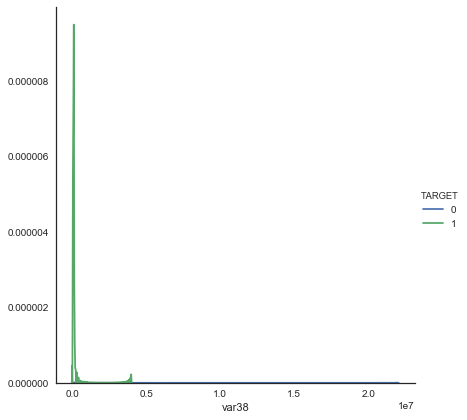

count    7.602000e+04
mean     1.172358e+05
std      1.826646e+05
min      5.163750e+03
25%      6.787061e+04
50%      1.064092e+05
75%      1.187563e+05
max      2.203474e+07
Name: var38, dtype: float64

In [37]:
#Looking into var38
sns.FacetGrid(train,hue="TARGET",size=6).map(sns.kdeplot,'var38').add_legend()
plt.show()
train.var38.describe()

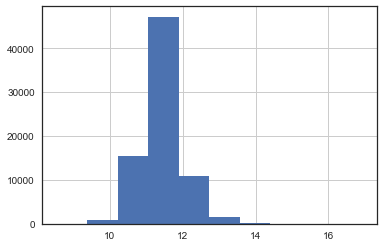

In [38]:
#Distribution of the log of var38
np.log(train.var38).hist()
plt.show()

In [39]:
log_var38 = pd.DataFrame(np.log(train.var38))
log_var38=log_var38.rename(index=str,columns = {"var38":"log_var38"})

In [40]:
#Looking into the dataset with selected features
print(len(X_sel.columns))
print(X_sel.columns)

59
Index(['var15', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3',
       'ind_var5', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12',
       'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto',
       'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13', 'ind_var14_0',
       'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_cte',
       'ind_var25_0', 'ind_var30', 'num_var4', 'num_var5', 'num_var8_0',
       'num_var8', 'num_var12_0', 'num_var12', 'num_var13_0',
       'num_var13_corto_0', 'num_var13_corto', 'num_var13', 'num_var24_0',
       'num_var24', 'num_var30_0', 'num_var30', 'num_var35', 'num_var42',
       'saldo_var12', 'saldo_var13_corto', 'saldo_var13', 'saldo_var24',
       'saldo_var30', 'saldo_var42', 'var36', 'imp_aport_var13_hace3',
       'ind_var43_recib_ult1', 'num_aport_var13_hace3', 'num_meses_var5_ult3',
       'num_meses_var8_ult3', 'num_meses_var12_ult3',
       'num_meses_var13_corto_ult3', 'saldo_medio_var5_hace2',
       'saldo_medio_var1

In [41]:
#Dropping var38
X_sel=X_sel.drop('var38',axis=1)
print(X_sel.columns)

Index(['var15', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3',
       'ind_var5', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12',
       'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto',
       'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13', 'ind_var14_0',
       'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_cte',
       'ind_var25_0', 'ind_var30', 'num_var4', 'num_var5', 'num_var8_0',
       'num_var8', 'num_var12_0', 'num_var12', 'num_var13_0',
       'num_var13_corto_0', 'num_var13_corto', 'num_var13', 'num_var24_0',
       'num_var24', 'num_var30_0', 'num_var30', 'num_var35', 'num_var42',
       'saldo_var12', 'saldo_var13_corto', 'saldo_var13', 'saldo_var24',
       'saldo_var30', 'saldo_var42', 'var36', 'imp_aport_var13_hace3',
       'ind_var43_recib_ult1', 'num_aport_var13_hace3', 'num_meses_var5_ult3',
       'num_meses_var8_ult3', 'num_meses_var12_ult3',
       'num_meses_var13_corto_ult3', 'saldo_medio_var5_hace2',
       'saldo_medio_var12_u

In [42]:
### Introducing a new feature from log of var38

#print(pd.Series(log_var38['log_var38']))
#X_sel['log_var38']=pd.Series(log_var38['log_var38'])
logvar38 = list(log_var38['log_var38'])
print(logvar38)

X_sel['log_var38']=logvar38
print(X_sel)

[10.576563904837231, 10.805233621759003, 11.11741717284272, 11.066762885838436, 11.672583628015142, 11.384816487302636, 11.46117585596068, 12.435750601047697, 11.532355669984662, 12.783985894954395, 11.739455754805734, 11.230144960184587, 11.71357871482566, 11.682136199314833, 11.464723492781973, 11.556022022709156, 11.672583628015142, 11.938285549051479, 12.03731802031264, 11.478345821373212, 11.144250667054212, 11.057937494334736, 11.672583628015142, 10.995001708962727, 11.672583628015142, 11.269461980080015, 11.365146890091587, 10.925364574579126, 10.459676905513632, 11.750492259426924, 11.53066508337323, 11.056033895713478, 11.72086164819352, 11.004018499401857, 11.672583628015142, 11.099106762546342, 10.769462617252623, 11.672583628015142, 10.70619807947487, 11.232499006773015, 11.634862792926041, 11.920707087884939, 11.479109495839154, 10.935987281918337, 11.723027301624427, 11.40950806024899, 11.952697309322385, 10.691910366849145, 11.648309228396135, 12.375816432774982, 12.4105

In [43]:
## Running the xgb model on the selected dataset with log of var38
xgtrain_1 = xgb.DMatrix(X_sel, label=y)
print ('Start cross validation')
cvresult = xgb.cv(xgb_param, xgtrain_1, num_boost_round=5000, nfold=15, metrics=['auc'],
     early_stopping_rounds=50, stratified=True, seed=1301)
print('Best number of trees = {}'.format(cvresult.shape[0]))
clf.set_params(n_estimators=cvresult.shape[0])
print('Fit on the trainingsdata')
clf.fit(X_sel, y, eval_metric='auc')
print('Overall AUC:', roc_auc_score(y, clf.predict_proba(X_sel)[:,1]))

Start cross validation
Best number of trees = 107
Fit on the trainingsdata
Overall AUC: 0.8861157177528964


In [44]:
print(X_sel.columns)

Index(['var15', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3',
       'ind_var5', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12',
       'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto',
       'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13', 'ind_var14_0',
       'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_cte',
       'ind_var25_0', 'ind_var30', 'num_var4', 'num_var5', 'num_var8_0',
       'num_var8', 'num_var12_0', 'num_var12', 'num_var13_0',
       'num_var13_corto_0', 'num_var13_corto', 'num_var13', 'num_var24_0',
       'num_var24', 'num_var30_0', 'num_var30', 'num_var35', 'num_var42',
       'saldo_var12', 'saldo_var13_corto', 'saldo_var13', 'saldo_var24',
       'saldo_var30', 'saldo_var42', 'var36', 'imp_aport_var13_hace3',
       'ind_var43_recib_ult1', 'num_aport_var13_hace3', 'num_meses_var5_ult3',
       'num_meses_var8_ult3', 'num_meses_var12_ult3',
       'num_meses_var13_corto_ult3', 'saldo_medio_var5_hace2',
       'saldo_medio_var12_u

In [45]:
#splitting into training and validation set

X_train,X_valid, y_train, y_valid = train_test_split(X_sel,y,test_size=0.30,random_state=7)

In [46]:
clf.fit(X_train,y_train,eval_metric='auc')
print('Overall AUC:', roc_auc_score(y_valid, clf.predict_proba(X_valid)[:,1]))

Overall AUC: 0.8216358024691358


In [47]:
#Scaling the columns in X_sel
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()
scaled_X_sel = scaler.fit_transform(X_sel)

In [49]:
scaled_X_sel

array([[-0.78824863, -0.01349292, -0.01553825, ..., -0.15086176,
         1.11465278, -1.61560274],
       [ 0.0607526 , -0.01349292, -0.01553825, ..., -0.1414472 ,
        -0.38424268, -1.20769065],
       [-0.78824863, -0.01349292, -0.01553825, ..., -0.15086176,
         0.2499054 , -0.65080256],
       ...,
       [-0.78824863, -0.01349292, -0.01553825, ..., -0.15086176,
         0.30755522, -0.48172311],
       [-0.63388477, -0.01349292, -0.01553825, ..., -0.15086176,
         0.2499054 , -0.25039843],
       [ 0.98693575, -0.01349292, -0.01553825, ..., -0.15086176,
         1.11465278,  0.33953018]])

In [50]:
xgtrain_1 = xgb.DMatrix(scaled_X_sel, label=y)

In [51]:
## Runnign the xgb model on the scaled dataset

print ('Start cross validation')
cvresult = xgb.cv(xgb_param, xgtrain_1, num_boost_round=5000, nfold=15, metrics=['auc'],
     early_stopping_rounds=50, stratified=True, seed=1301)
print('Best number of trees = {}'.format(cvresult.shape[0]))
clf.set_params(n_estimators=cvresult.shape[0])
print('Fit on the trainingsdata')
clf.fit(scaled_X_sel, y, eval_metric='auc')
print('Overall AUC:', roc_auc_score(y, clf.predict_proba(scaled_X_sel)[:,1]))

Start cross validation
Best number of trees = 83
Fit on the trainingsdata
Overall AUC: 0.8815718143570979


In [52]:
#splitting into training and validation set

X_train,X_valid, y_train, y_valid = train_test_split(scaled_X_sel,y,test_size=0.30,random_state=7)

In [53]:
clf.fit(X_train,y_train,eval_metric='auc')
print('Overall AUC:', roc_auc_score(y_valid, clf.predict_proba(X_valid)[:,1]))

Overall AUC: 0.8210453249743854


<h3> MLP Classifier

In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [55]:
# Building a basic mlpclassifier model
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [56]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [57]:
print('Overall AUC:', roc_auc_score(y_valid, mlp.predict_proba(X_valid)[:,1]))

Overall AUC: 0.8071928035951591


<h4> Tuning MLP Classifier

In [58]:
mlp_clf = MLPClassifier(solver='lbfgs',random_state=1,
                        activation='logistic',hidden_layer_sizes=(31,))
param_grid_mlp = {
    "alpha":10.0 ** -np.arange(-4,7)
}

mlp_grid= GridSearchCV(estimator=mlp_clf,param_grid=param_grid_mlp,
                      cv=5)
mlp_grid.fit(X_train,y_train)

print(mlp_grid.best_estimator_)
print(mlp_grid.best_score_)

MLPClassifier(activation='logistic', alpha=10000.0, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(31,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
0.9603863644905476


In [59]:
#Initializing mlp classifier using activation = logistic
mlp_clf1 = MLPClassifier(activation='logistic', alpha=1.0, batch_size='auto', early_stopping=False, 
                         epsilon=1e-08,
       hidden_layer_sizes=(30,12), learning_rate='invscaling',
       learning_rate_init=0.1, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

mlp_clf1.fit(X_train,y_train)

print('Overall AUC for mlpClassifier on validation set:', roc_auc_score(y_valid, mlp_clf1.predict_proba(X_valid)[:,1]))

Overall AUC for mlpClassifier on validation set: 0.8099035271919413




<h3>Logistic Regression using grid search for best score

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold

/Users/soham/miniconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/soham/miniconda3/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [61]:
fold = KFold(len(y_train),n_folds=10,shuffle=True,random_state=555)

In [62]:
## gridsearch to tune hyperparameter of logistic regression
grid = {
    'C':np.power(10.0,np.arange(-10,10)),
    'solver':['newton-cg']
}

log_grid_clf = LogisticRegression(penalty='l2',random_state=555,
                                  max_iter=10000,tol=10)
gs = GridSearchCV(log_grid_clf,grid,scoring='roc_auc',cv=fold)

In [63]:
gs.fit(X_train,y_train)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=53214, n_folds=10, shuffle=True, random_state=555),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=555, solver='liblinear', tol=10,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09]), 'solver': ['newton-cg']},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [64]:
print('gs.best_score:',gs.best_score_)
print('gs.best_params_:',gs.best_params_)

gs.best_score: 0.7916586445104051
gs.best_params_: {'C': 1.0, 'solver': 'newton-cg'}


In [65]:
log_clf = LogisticRegression(penalty='l2',random_state=555,
                                  max_iter=10000,tol=10,C=1.0,
                            solver='newton-cg')
log_clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=555, solver='newton-cg', tol=10,
          verbose=0, warm_start=False)

In [66]:
# Getting the roc auc score
log_predictions = log_clf.predict_proba(X_valid)
roc_auc_log = roc_auc_score(y_valid,log_clf.predict_proba(X_valid)[:,1])
print('roc_auc_score:',roc_auc_log)

roc_auc_score: 0.7699392353185834


In [67]:
from sklearn.metrics import roc_curve

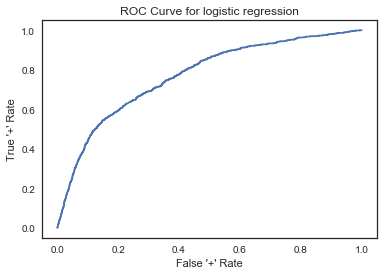

In [68]:
## Drawing a roc curve
fpr_log, tpr_log, _ = roc_curve(y_valid,log_predictions[:,1])

plt.clf()
plt.plot(fpr_log,tpr_log)
plt.xlabel('False \'+\' Rate')
plt.ylabel('True \'+\' Rate')
plt.title('ROC Curve for logistic regression')
plt.show()

<h3>XGBoost with parameter tuning using GridSearchCV

In [69]:
# Hyperparameters of XGBoost
param_test ={
    'learning_rate':[0.001,0.01,0.1,0.5],
    'max_depth':[4,5,6,7,8],
    'min_child_weight':[4,5,6,7,8],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
    'reg_alpha':[1e-5,1e-2,0.1,1,10,100]   
}


In [70]:
#Finding the max_depth and min_child_weight while keeping others fixed
param_test1 ={
    'max_depth':[4,5,6,7,8],
    'min_child_weight':[4,5,6,7,8],
    #'reg_alpha':[1e-5,1e-2,0.1,1,10,100]   
}
gridsearch_xg = GridSearchCV(estimator=XGBClassifier(
    learning_rate=0.1,n_estimator=88,objective='binary:logistic',
    gamma=0,subsample=0.8,colsample_bytree=0.8,
    nthread=4,seed=27,max_depth=5,min_child_weight=1),
                             param_grid = param_test1,scoring='roc_auc',
                             n_jobs=4,iid=False,cv=5)


In [71]:
gridsearch_xg.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimator=88,
       n_estimators=100, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'min_child_weight': [4, 5, 6, 7, 8], 'max_depth': [4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [72]:
print(gridsearch_xg.best_params_,gridsearch_xg.best_score_)

{'min_child_weight': 5, 'max_depth': 4} 0.8370071061117347


In [73]:
#Keeping max_depth =4 and min_child_weight = 5 finding gamma
param_test2 ={
    'gamma':[1/10.0 for i in range(0,5)]
    #'reg_alpha':[1e-5,1e-2,0.1,1,10,100]   
}
gridsearch_xg2 = GridSearchCV(estimator=XGBClassifier(
    learning_rate=0.1,n_estimator=88,objective='binary:logistic',
    gamma=0,subsample=0.8,colsample_bytree=0.8,
    nthread=4,seed=27,max_depth=4,min_child_weight=5),
                             param_grid = param_test2,scoring='roc_auc',
                             n_jobs=4,iid=False,cv=5)

In [74]:
gridsearch_xg2.fit(X_train,y_train)
print(gridsearch_xg2.best_params_,gridsearch_xg2.best_score_)

{'gamma': 0.1} 0.8370413671945777


In [75]:
#keeping gamma = 0.1 and max_depth and min_child_weight as previous
# finding subsample and colsample_bytree
param_test3 ={
    'subsample':[i/10.0 for i in range(2,7)],
    'colsample_bytree':[i/10.0 for i in range(2,10)],
    #'reg_alpha':[1e-5,1e-2,0.1,1,10,100]   
}

gridsearch_xg3 = GridSearchCV(estimator=XGBClassifier(
    learning_rate=0.1,n_estimator=88,objective='binary:logistic',
    gamma=0.1,subsample=0.8,colsample_bytree=0.7,
    nthread=4,seed=27,max_depth=4,min_child_weight=5),
                             param_grid = param_test3,scoring='roc_auc',
                             n_jobs=4,iid=False,cv=5)



In [76]:
gridsearch_xg3.fit(X_train,y_train)
print(gridsearch_xg3.best_params_,gridsearch_xg3.best_score_)

{'subsample': 0.6, 'colsample_bytree': 0.6} 0.8372315415472578


In [77]:
#Keeping colsample = 0.6 and subsample =0.6 with previous paramters
#finding regularization parameters

param_test4 ={
    'reg_alpha':[0.0005,0.0095,0.0006]   
}

gridsearch_xg4 = GridSearchCV(estimator=XGBClassifier(
    learning_rate=0.1,n_estimator=88,objective='binary:logistic',
    gamma=0.1,subsample=0.6,colsample_bytree=0.6,
    nthread=4,seed=27,max_depth=4,min_child_weight=5),
                             param_grid = param_test4,scoring='roc_auc',
                             n_jobs=4,iid=False,cv=5)

In [78]:
gridsearch_xg4.fit(X_train,y_train)
print(gridsearch_xg4.best_params_,gridsearch_xg4.best_score_)

{'reg_alpha': 0.0005} 0.8373488885899345


In [79]:
#lets reduce the learning rate
xgtrain1 = xgb.DMatrix(X_train, label=y_train,feature_names=features)
clf_xgb1 = xgb.XGBClassifier(missing=9999999999,
                max_depth = 4,
                n_estimators=700,
                learning_rate=0.01, 
                nthread=4,
                subsample=0.6,
                colsample_bytree=0.6,
                min_child_weight = 5,
                seed=1000)
xgb_param = clf_xgb1.get_xgb_params()
#do cross validation
print ('Start cross validation')
cvresult = xgb.cv(xgb_param, xgtrain1, num_boost_round=5000, nfold=15, metrics=['auc'],
     early_stopping_rounds=50, stratified=True, seed=1301)
print('Best number of trees = {}'.format(cvresult.shape[0]))
clf_xgb1.set_params(n_estimators=cvresult.shape[0])
print('Fit on the trainingsdata')
clf_xgb1.fit(X_train, y_train, eval_metric='auc')
print('Overall AUC:', roc_auc_score(y_train, clf_xgb1.predict_proba(X_train)[:,1]))



Start cross validation
Best number of trees = 731
Fit on the trainingsdata
Overall AUC: 0.8548173185233712


In [80]:
#Fit on validation set
print('Overall AUC:', roc_auc_score(y_valid, clf_xgb1.predict_proba(X_valid)[:,1]))

Overall AUC: 0.8261192773162098


In [81]:
xgb_predictions =clf_xgb1.predict_proba(X_valid)
roc_auc_xgb = roc_auc_score(y_valid,clf_xgb1.predict_proba(X_valid)[:,1])
print('roc_auc_score:',roc_auc_xgb)

roc_auc_score: 0.8261192773162098


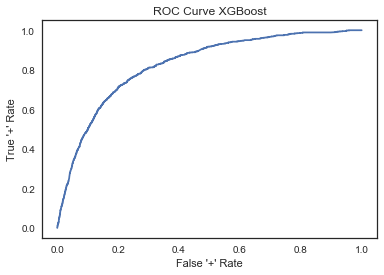

In [82]:
## Drawing the ROC curve of xgboost
fpr_xgb, tpr_xgb, _ = roc_curve(y_valid,xgb_predictions[:,1])

plt.clf()
plt.plot(fpr_xgb,tpr_xgb)
plt.xlabel('False \'+\' Rate')
plt.ylabel('True \'+\' Rate')
plt.title('ROC Curve XGBoost')
plt.show()

In [83]:
## This model of xgboost without the tuned hyperparameter shows overfitting

clf = xgb.XGBClassifier(missing=9999999999,
                max_depth = 7,
                n_estimators=700,
                learning_rate=0.1, 
                nthread=4,
                subsample=1.0,
                colsample_bytree=0.5,
                min_child_weight = 3,
                seed=1301)
xgb_param = clf_xgb1.get_xgb_params()
#do cross validation
print ('Start cross validation')
cvresult = xgb.cv(xgb_param, xgtrain1, num_boost_round=5000, nfold=15, metrics=['auc'],
     early_stopping_rounds=50, stratified=True, seed=1301)
clf.set_params(n_estimators=cvresult.shape[0])
print('Fit on the trainingsdata')
clf.fit(X_train, y_train, eval_metric='auc')
print('Overall AUC:', roc_auc_score(y_train, clf.predict_proba(X_train)[:,1]))


#Overfitting

Start cross validation
Fit on the trainingsdata
Overall AUC: 0.9436950155909907


In [84]:
#Overfitting
print('Overall AUC:', roc_auc_score(y_valid, clf.predict_proba(X_valid)[:,1]))

Overall AUC: 0.8059184951865039


<h3>Random Forest using GridSearchCV

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
clf_random = RandomForestClassifier(random_state=None)

In [87]:
## Hyperparameters of Random Forest
param_grid = {
    'n_estimators':[100,200],
    'criterion':['entropy'],
    'max_features':["auto"],
    'max_depth' : [6],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[2,3],
    'bootstrap':[True,False]
}

In [88]:
random_cv = GridSearchCV(estimator=clf_random,param_grid=param_grid,
                         scoring='roc_auc',cv=5)
random_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 3], 'n_estimators': [100, 200], 'max_features': ['auto'], 'criterion': ['entropy'], 'max_depth': [6], 'min_samples_split': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [89]:
random_cv.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 200}

In [90]:
random_cv.best_score_

0.8160131251674362

In [91]:
rf_clf = RandomForestClassifier(random_state=None,
                                max_features='auto',
                               max_depth=6,
                                n_estimators=100,
                                criterion='entropy',
                               min_samples_leaf=1,
                               min_samples_split=3,
                               bootstrap=True)

In [92]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [93]:
rf_roc_auc = roc_auc_score(y_valid, rf_clf.predict_proba(X_valid)[:,1])
print('Overall AUC for Random Forest:', rf_roc_auc)

Overall AUC for Random Forest: 0.7950716445012528


In [94]:
from sklearn.metrics import roc_curve



roc_auc_score: 0.7950716445012528


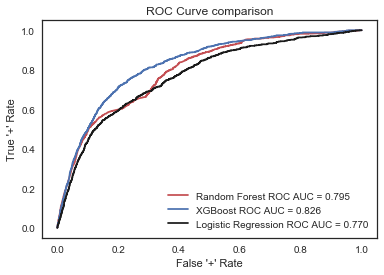

In [95]:
## Comparison of the roc curves of the three models

random_predictions =rf_clf.predict_proba(X_valid)
print('roc_auc_score:',roc_auc_score(y_valid,rf_clf.predict_proba(X_valid)[:,1]))

fpr_rf, tpr_rf, _ = roc_curve(y_valid,random_predictions[:,1])

random_label = "Random Forest ROC AUC = {:.3f}".format(rf_roc_auc)
xgb_label = "XGBoost ROC AUC = {:.3f}".format(roc_auc_xgb)
log_label = "Logistic Regression ROC AUC = {:.3f}".format(roc_auc_log)

plt.clf()
plt.plot(fpr_rf,tpr_rf,'r',label=random_label)
plt.plot(fpr_xgb,tpr_xgb,'b',label=xgb_label)
plt.plot(fpr_log,tpr_log,'k',label=log_label)
plt.xlabel('False \'+\' Rate')
plt.ylabel('True \'+\' Rate')
plt.title('ROC Curve comparison')

plt.legend(loc=0)

plt.show()

In [96]:
#Voting Classifier using mlp, xgboost and randomforest
from sklearn.ensemble import VotingClassifier
mlp_clf2 = MLPClassifier(activation='logistic', alpha=1.0, batch_size='auto', early_stopping=False, 
                         epsilon=1e-08,
       hidden_layer_sizes=(30,12), learning_rate='invscaling',
       learning_rate_init=0.1, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

clf_xgb2 = xgb.XGBClassifier(missing=9999999999,
                max_depth = 4,
                n_estimators=700,
                learning_rate=0.01, 
                nthread=4,
                subsample=0.6,
                colsample_bytree=0.6,
                min_child_weight = 6,
                seed=1000)

vot_clf = VotingClassifier(estimators=[('mlp',mlp_clf2),
                                      ('xgb',clf_xgb2)
                                      ],
                          voting='soft',
                          weights=[1,9])


In [97]:
vot_clf.fit(X_train,y_train)

print('Overall AUC for voting classifier:', roc_auc_score(y_valid, vot_clf.predict_proba(X_valid)[:,1]))

Overall AUC for voting classifier: 0.82619043996064


roc_auc_score: 0.7950716445012528


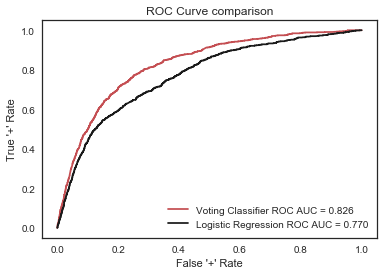

In [98]:
## ROC curve comparison of Voting clssifier and logistic regression
vot_predictions =vot_clf.predict_proba(X_valid)
vot_roc_auc = roc_auc_score(y_valid, vot_clf.predict_proba(X_valid)[:,1])
print('roc_auc_score:',roc_auc_score(y_valid,rf_clf.predict_proba(X_valid)[:,1]))

fpr_vot, tpr_vot, _ = roc_curve(y_valid,vot_predictions[:,1])

vot_label = "Voting Classifier ROC AUC = {:.3f}".format(vot_roc_auc)
log_label = "Logistic Regression ROC AUC = {:.3f}".format(roc_auc_log)

plt.clf()
plt.plot(fpr_vot,tpr_vot,'r',label=vot_label)
plt.plot(fpr_log,tpr_log,'k',label=log_label)
plt.xlabel('False \'+\' Rate')
plt.ylabel('True \'+\' Rate')
plt.title('ROC Curve comparison')

plt.legend(loc=0)

plt.show()

In [99]:
## Stacking classifier with xgboost, mlpclassifier and the voting classifer model.

from mlxtend.classifier import StackingClassifier

stck_clf = StackingClassifier(classifiers=[clf_xgb2,mlp_clf2,vot_clf],
                              use_probas=True,
                              average_probas=False,
                             meta_classifier=mlp_clf2)

stck_clf.fit(X_train,y_train)


print('Overall AUC for stacking classifier:', roc_auc_score(y_valid, stck_clf.predict_proba(X_valid)[:,1]))


Overall AUC for stacking classifier: 0.826130233218702


<hr>
<h3>Displaying the xgboost feature importance

In [100]:
import xgboost


In [101]:
booster = clf_xgb1.get_booster()
booster

In [102]:
mapper = {'f{0}'.format(i): v for i,v in enumerate(xgtrain1.feature_names)}
mapped = {mapper[k]: v for k, v in booster.get_fscore().items()}
mapped

{'imp_aport_var13_hace3': 26,
 'ind_var12': 1,
 'ind_var12_0': 12,
 'ind_var13': 26,
 'ind_var13_0': 62,
 'ind_var14_0': 1,
 'ind_var24': 4,
 'ind_var24_0': 3,
 'ind_var25_0': 14,
 'ind_var25_cte': 22,
 'ind_var26_cte': 44,
 'ind_var30': 38,
 'ind_var43_recib_ult1': 55,
 'ind_var5': 33,
 'ind_var8': 57,
 'ind_var8_0': 85,
 'n0': 1807,
 'num_aport_var13_hace3': 7,
 'num_meses_var12_ult3': 9,
 'num_meses_var13_corto_ult3': 5,
 'num_meses_var5_ult3': 247,
 'num_meses_var8_ult3': 22,
 'num_var12_0': 8,
 'num_var13': 15,
 'num_var13_0': 26,
 'num_var13_corto_0': 2,
 'num_var30': 20,
 'num_var30_0': 234,
 'num_var35': 127,
 'num_var4': 151,
 'num_var42': 12,
 'num_var5': 19,
 'num_var8': 26,
 'num_var8_0': 38,
 'saldo_medio_var12_ult1': 24,
 'saldo_medio_var12_ult3': 18,
 'saldo_medio_var13_corto_hace2': 17,
 'saldo_medio_var13_corto_ult1': 7,
 'saldo_medio_var13_corto_ult3': 6,
 'saldo_medio_var5_hace2': 813,
 'saldo_var12': 13,
 'saldo_var13': 6,
 'saldo_var13_corto': 15,
 'saldo_var24': 1

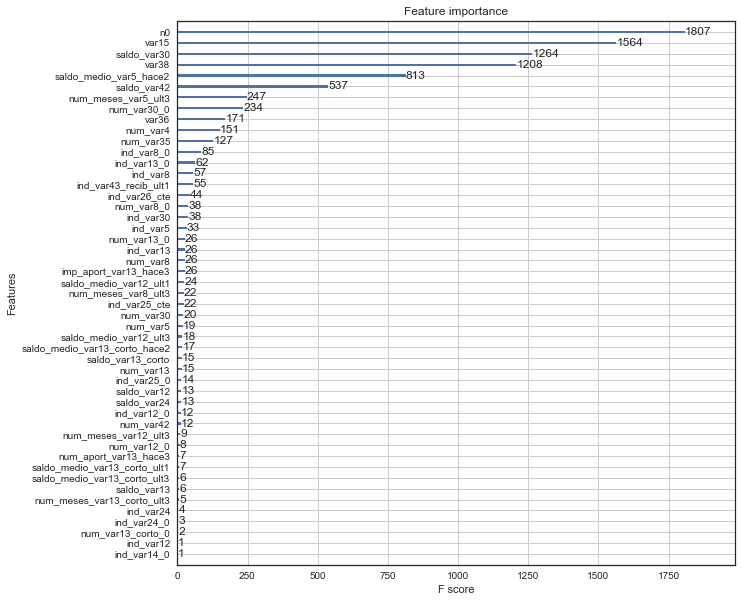

In [103]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
xgboost.plot_importance(mapped,ax=ax)
plt.yticks(fontsize=10)
plt.show()

<hr>
<h3>Validating the final model using KFold cross validation

In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [114]:
fold = KFold(5,shuffle=True,random_state=555)


In [115]:
scores = cross_val_score(vot_clf,scaled_X_sel,y,cv=fold,scoring='roc_auc')

In [118]:
scores.mean()

0.8343827732036913

In [119]:
scores.var()

8.913290326869497e-06

In [120]:
scores.std()

0.002985513410934457

In [128]:
scores

array([0.8324489 , 0.83255108, 0.83510804, 0.83188273, 0.83992311])